<a href="https://colab.research.google.com/github/imrazack-cisco/bits/blob/main/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

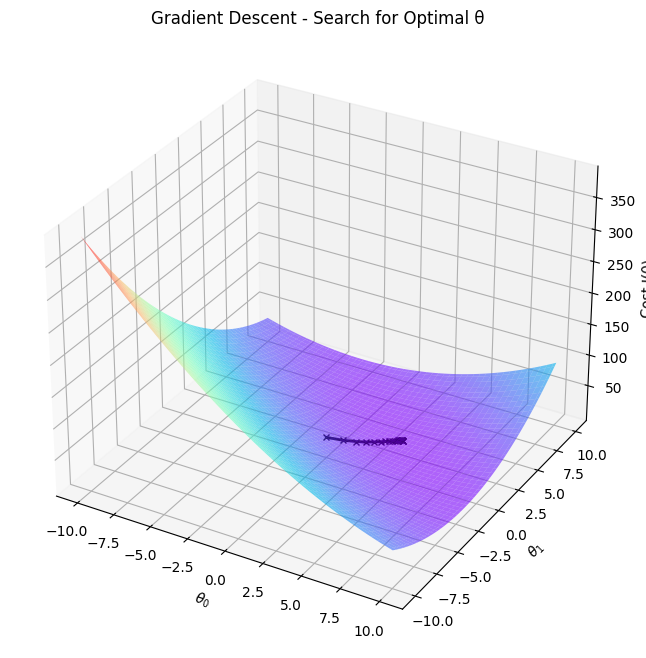

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hypothetical cost function J(θ0, θ1) for linear regression
def compute_cost(theta_0, theta_1, X, y):
    m = len(y)
    predictions = theta_0 + theta_1 * X
    return (1/(2*m)) * np.sum((predictions - y)**2)

# Create the data for visualization
X = np.linspace(0, 2, 100)  # Input values
y = 4 + 3 * X + np.random.randn(100)  # True output (y = 4 + 3*X + noise)

# Create a grid for θ0 and θ1 values
theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-10, 10, 100)
theta_0, theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Compute cost for each combination of θ0 and θ1
J_vals = np.zeros_like(theta_0)
for i in range(theta_0.shape[0]):
    for j in range(theta_0.shape[1]):
        J_vals[i, j] = compute_cost(theta_0[i, j], theta_1[i, j], X, y)

# Gradient descent function
def gradient_descent(X, y, theta_0, theta_1, learning_rate, n_iterations):
    m = len(y)
    theta_history = [(theta_0, theta_1)]
    for i in range(n_iterations):
        # Compute the gradients
        predictions = theta_0 + theta_1 * X
        grad_theta_0 = (1/m) * np.sum(predictions - y)
        grad_theta_1 = (1/m) * np.sum((predictions - y) * X)

        # Update theta
        theta_0 -= learning_rate * grad_theta_0
        theta_1 -= learning_rate * grad_theta_1

        # Save history
        theta_history.append((theta_0, theta_1))

    return theta_0, theta_1, theta_history

# Run gradient descent
theta_0_initial, theta_1_initial = 0, 0
learning_rate = 0.1
n_iterations = 20
theta_0_final, theta_1_final, theta_history = gradient_descent(X, y, theta_0_initial, theta_1_initial, learning_rate, n_iterations)

# Plot the cost function surface and gradient descent path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(theta_0, theta_1, J_vals, cmap='rainbow', alpha=0.6)

# Plot the gradient descent path
theta_history = np.array(theta_history)
ax.plot(theta_history[:, 0], theta_history[:, 1], [compute_cost(t0, t1, X, y) for t0, t1 in theta_history], 'kx-', markersize=5, lw=2)

# Labels and titles
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost J(θ)')
ax.set_title('Gradient Descent - Search for Optimal θ')

plt.show()
